# <font color=red> Timpaweap 1st Order Trend Plots


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#Fix me dFthinSectionData = pd.read_excel('/Users/sarahcronin/Desktop/BYU_Data.xlsx', sheet_name = 'DepoEnv');
#Fix me dFthinSectionData.set_index('Samples', inplace=True);

#set the figure resolution much higher:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 500

Import the data, and normalize it to 100%


note, the path of the following line should reflect where your data is stored

In [2]:
#import data
df = pd.read_excel(r'C:\Users\therobe7\OneDrive\SRC_and_Research\MountJoy\Correct Timpoweap Data sheet.xlsx',
                   sheet_name='AllData')
#df = pd.read_excel(r'C:\Users\duckm\OneDrive\OneDrive\SRC_and_Research\MountJoy\Correct Timpoweap Data sheet.xlsx',
#                   sheet_name='AllData')

#normalize dataset to percent of points taken:
#dfNorm = df[["Irregular fenestra", "Horizontal sheetcrack", ""]].divide(df["Correction factor"], axis="index")
dfNorm = df.loc[:,"Irregular fenestra":"Seafloor micrite"].divide(df["Correction factor"], axis="index")
dfNorm["Sample"] = df['Sample']
#dfNorm["Lateral Index"] = df['Lateral Index']
#dfNorm["Vertical Index"] = df['Vertical Index']

# Lateral Trend Bar Plot

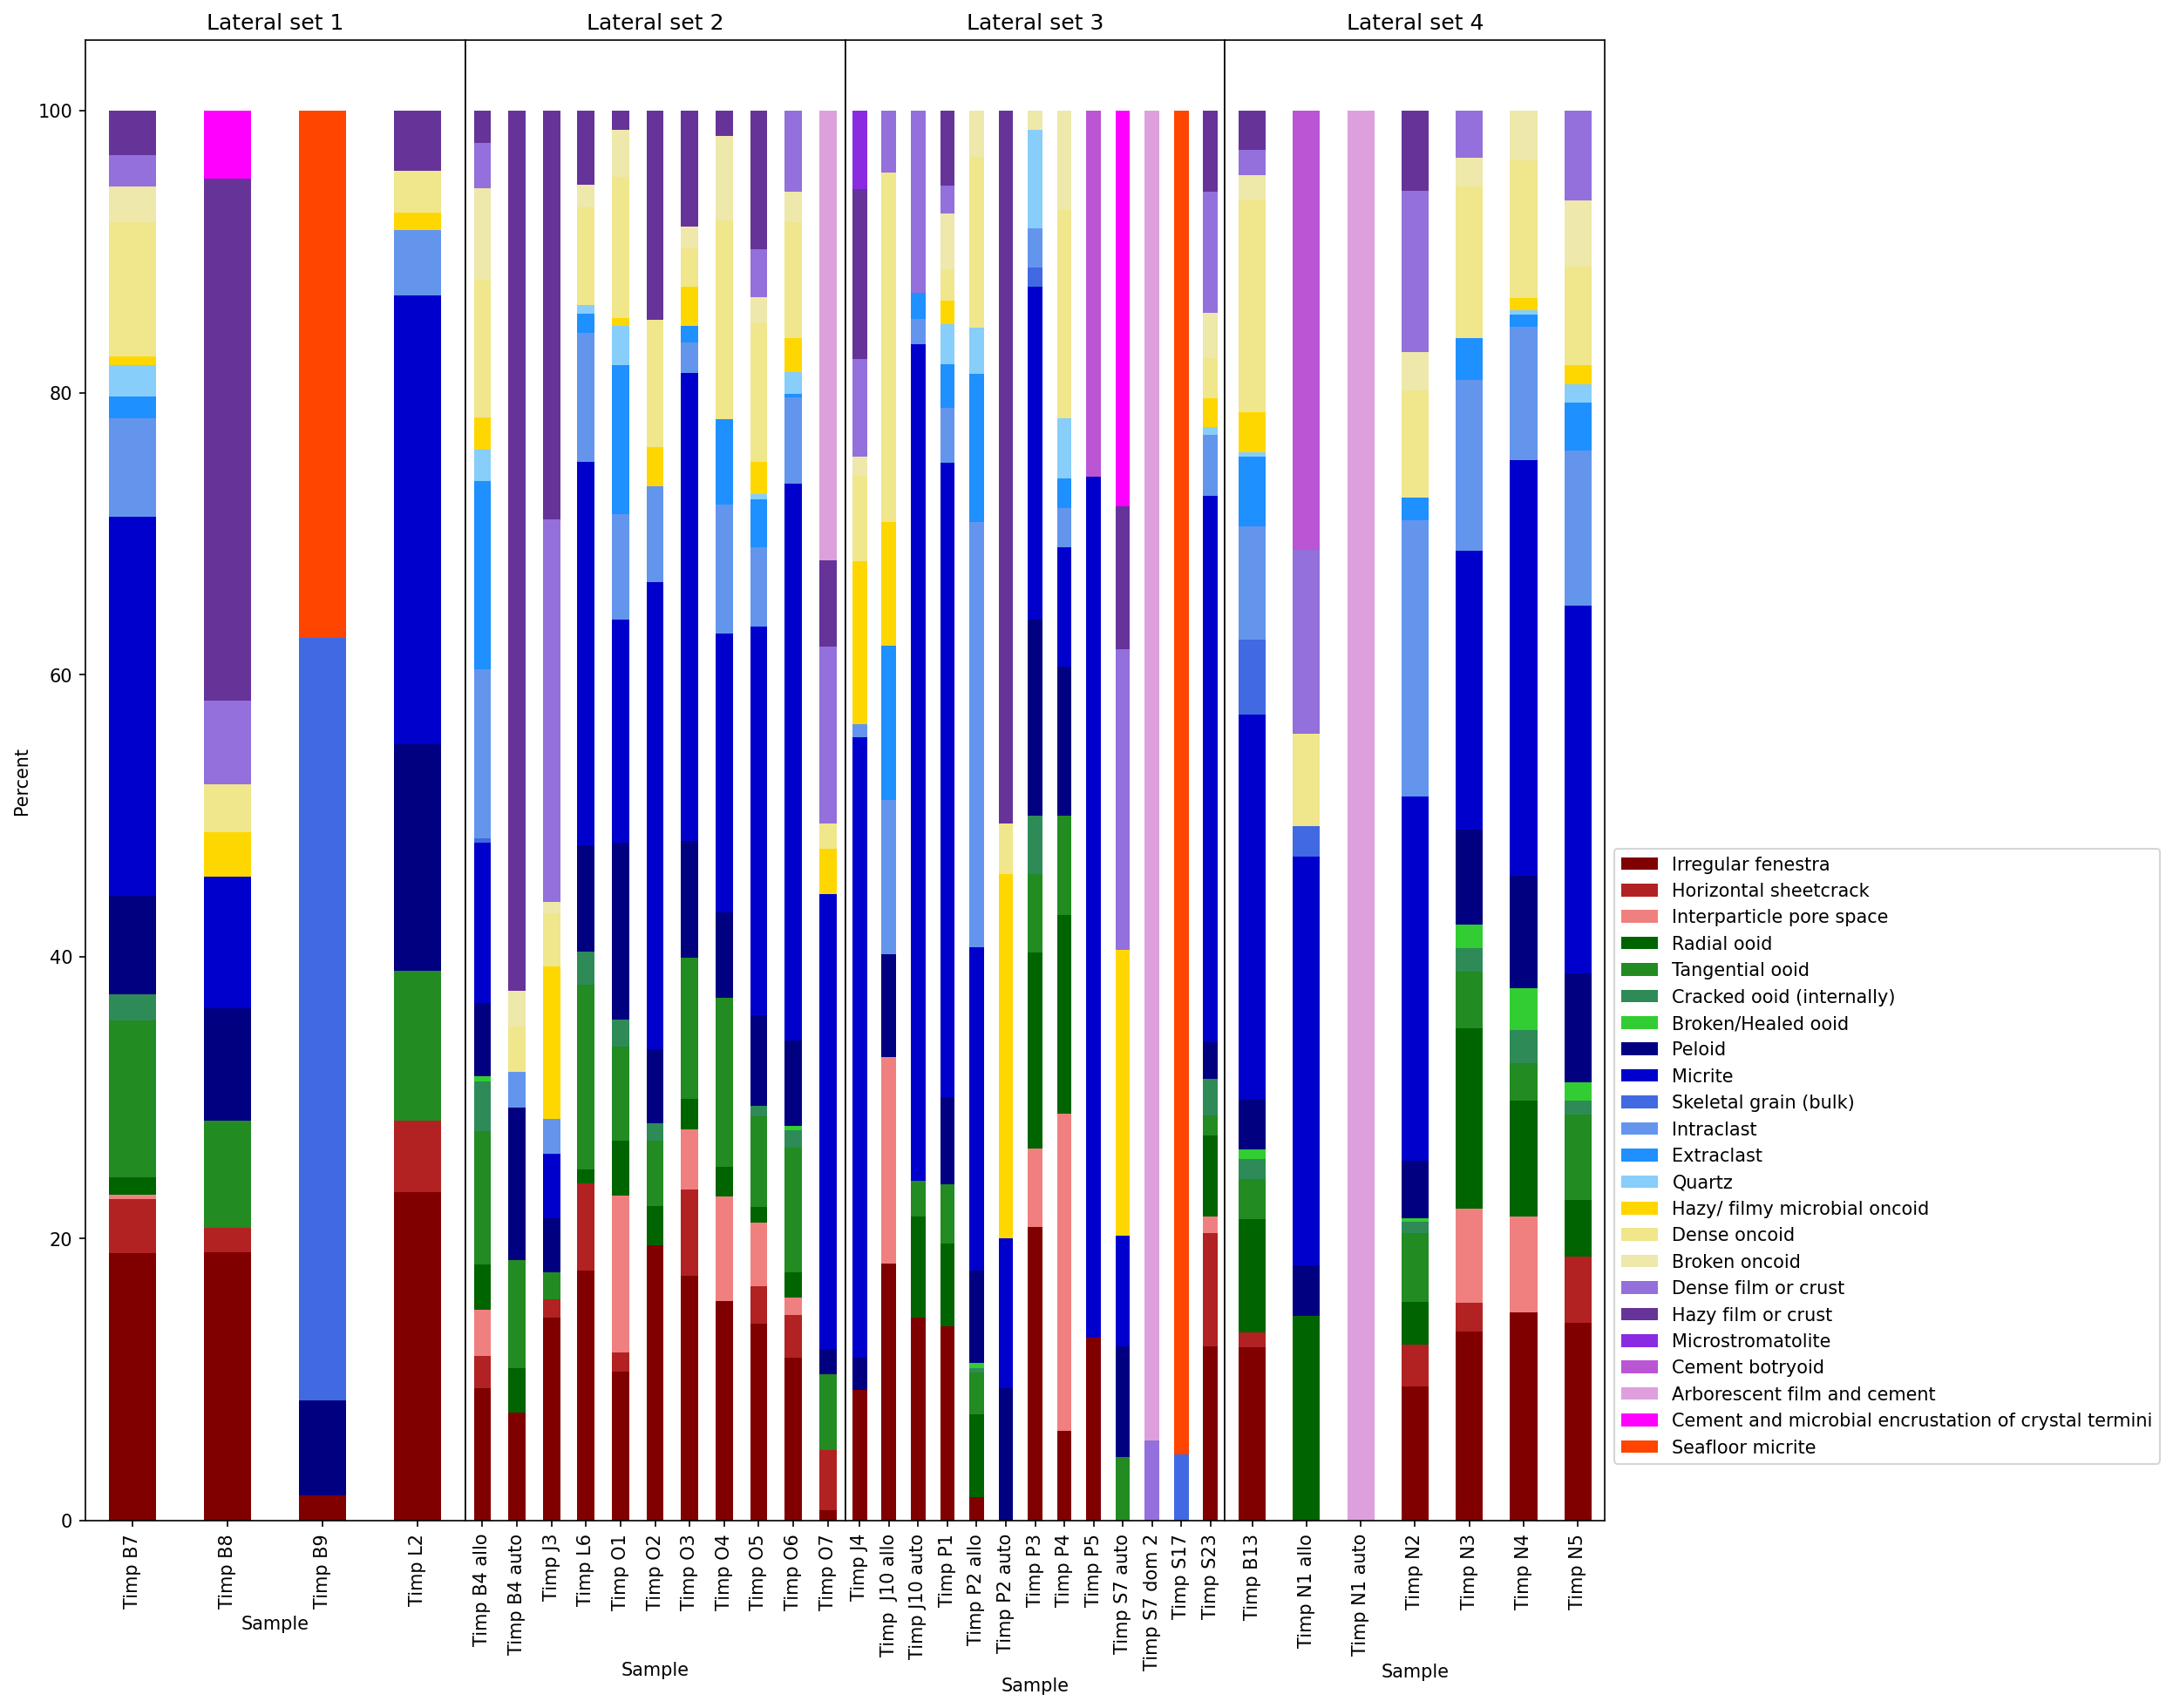

In [3]:
#set up the color groupings
data = {'col':['maroon','firebrick','lightcoral','darkgreen','forestgreen','seagreen','limegreen',\
               'navy','mediumblue','royalblue','cornflowerblue','dodgerblue','lightskyblue','gold',\
               'khaki','palegoldenrod','mediumpurple','rebeccapurple','blueviolet','mediumorchid',\
               'plum','magenta','orangered']}
sym = pd.DataFrame(data)

#set up figure axis
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15,15))

fig.subplots_adjust(wspace=0,)


lat1 = dfNorm.where(df['Lateral Index'].eq(1))
lat2 = dfNorm.where(df['Lateral Index'].eq(2))
lat3 = dfNorm.where(df['Lateral Index'].eq(3))
lat4 = dfNorm.where(df['Lateral Index'].eq(4))
#lat5 = dfNorm.where(dfNorm['Lateral Index'].eq(5))

#drop nans -- this step is not working otherwise this is good to go
lat1d = lat1.dropna(subset=['Sample'])
lat2d = lat2.dropna(subset=['Sample'])
lat3d = lat3.dropna(subset=['Sample'])
lat4d = lat4.dropna(subset=['Sample'])
#lat5d = lat5.dropna(subset=['Sample'])

#plot
lat1d.plot.bar(x='Sample', stacked=True, ax=ax[0], legend=False, color=sym['col'],\
               title='Lateral set 1', ylabel='Percent')
lat2d.plot.bar(x='Sample', stacked=True,ax=ax[1], legend=False, color=sym['col'],\
               title='Lateral set 2', yticks=[])
lat3d.plot.bar(x='Sample', stacked=True,ax=ax[2], legend=False, color=sym['col'],\
               title='Lateral set 3', yticks=[])
lat4d.plot.bar(x='Sample', stacked=True,ax=ax[3], legend=False, color=sym['col'],\
               title='Lateral set 4', yticks=[])
#lat5d.plot.bar(x='Sample', stacked=True,ax=ax[4], legend=False)

plt.legend(bbox_to_anchor =(1, .46))



In [79]:
#plot Lateral Samples
# fix to samples collected laterally plotBiotite = dFthinSectionData.loc[:, "Biotite"];
# plotBiotite.plot(kind="bar", stacked=True, legend=True, color="brown")
# plt.title("Biotite Percentages")
# plt.xlabel("Samples")
# plt.ylabel("Percentages")



# Vertical Trend Bar Plot

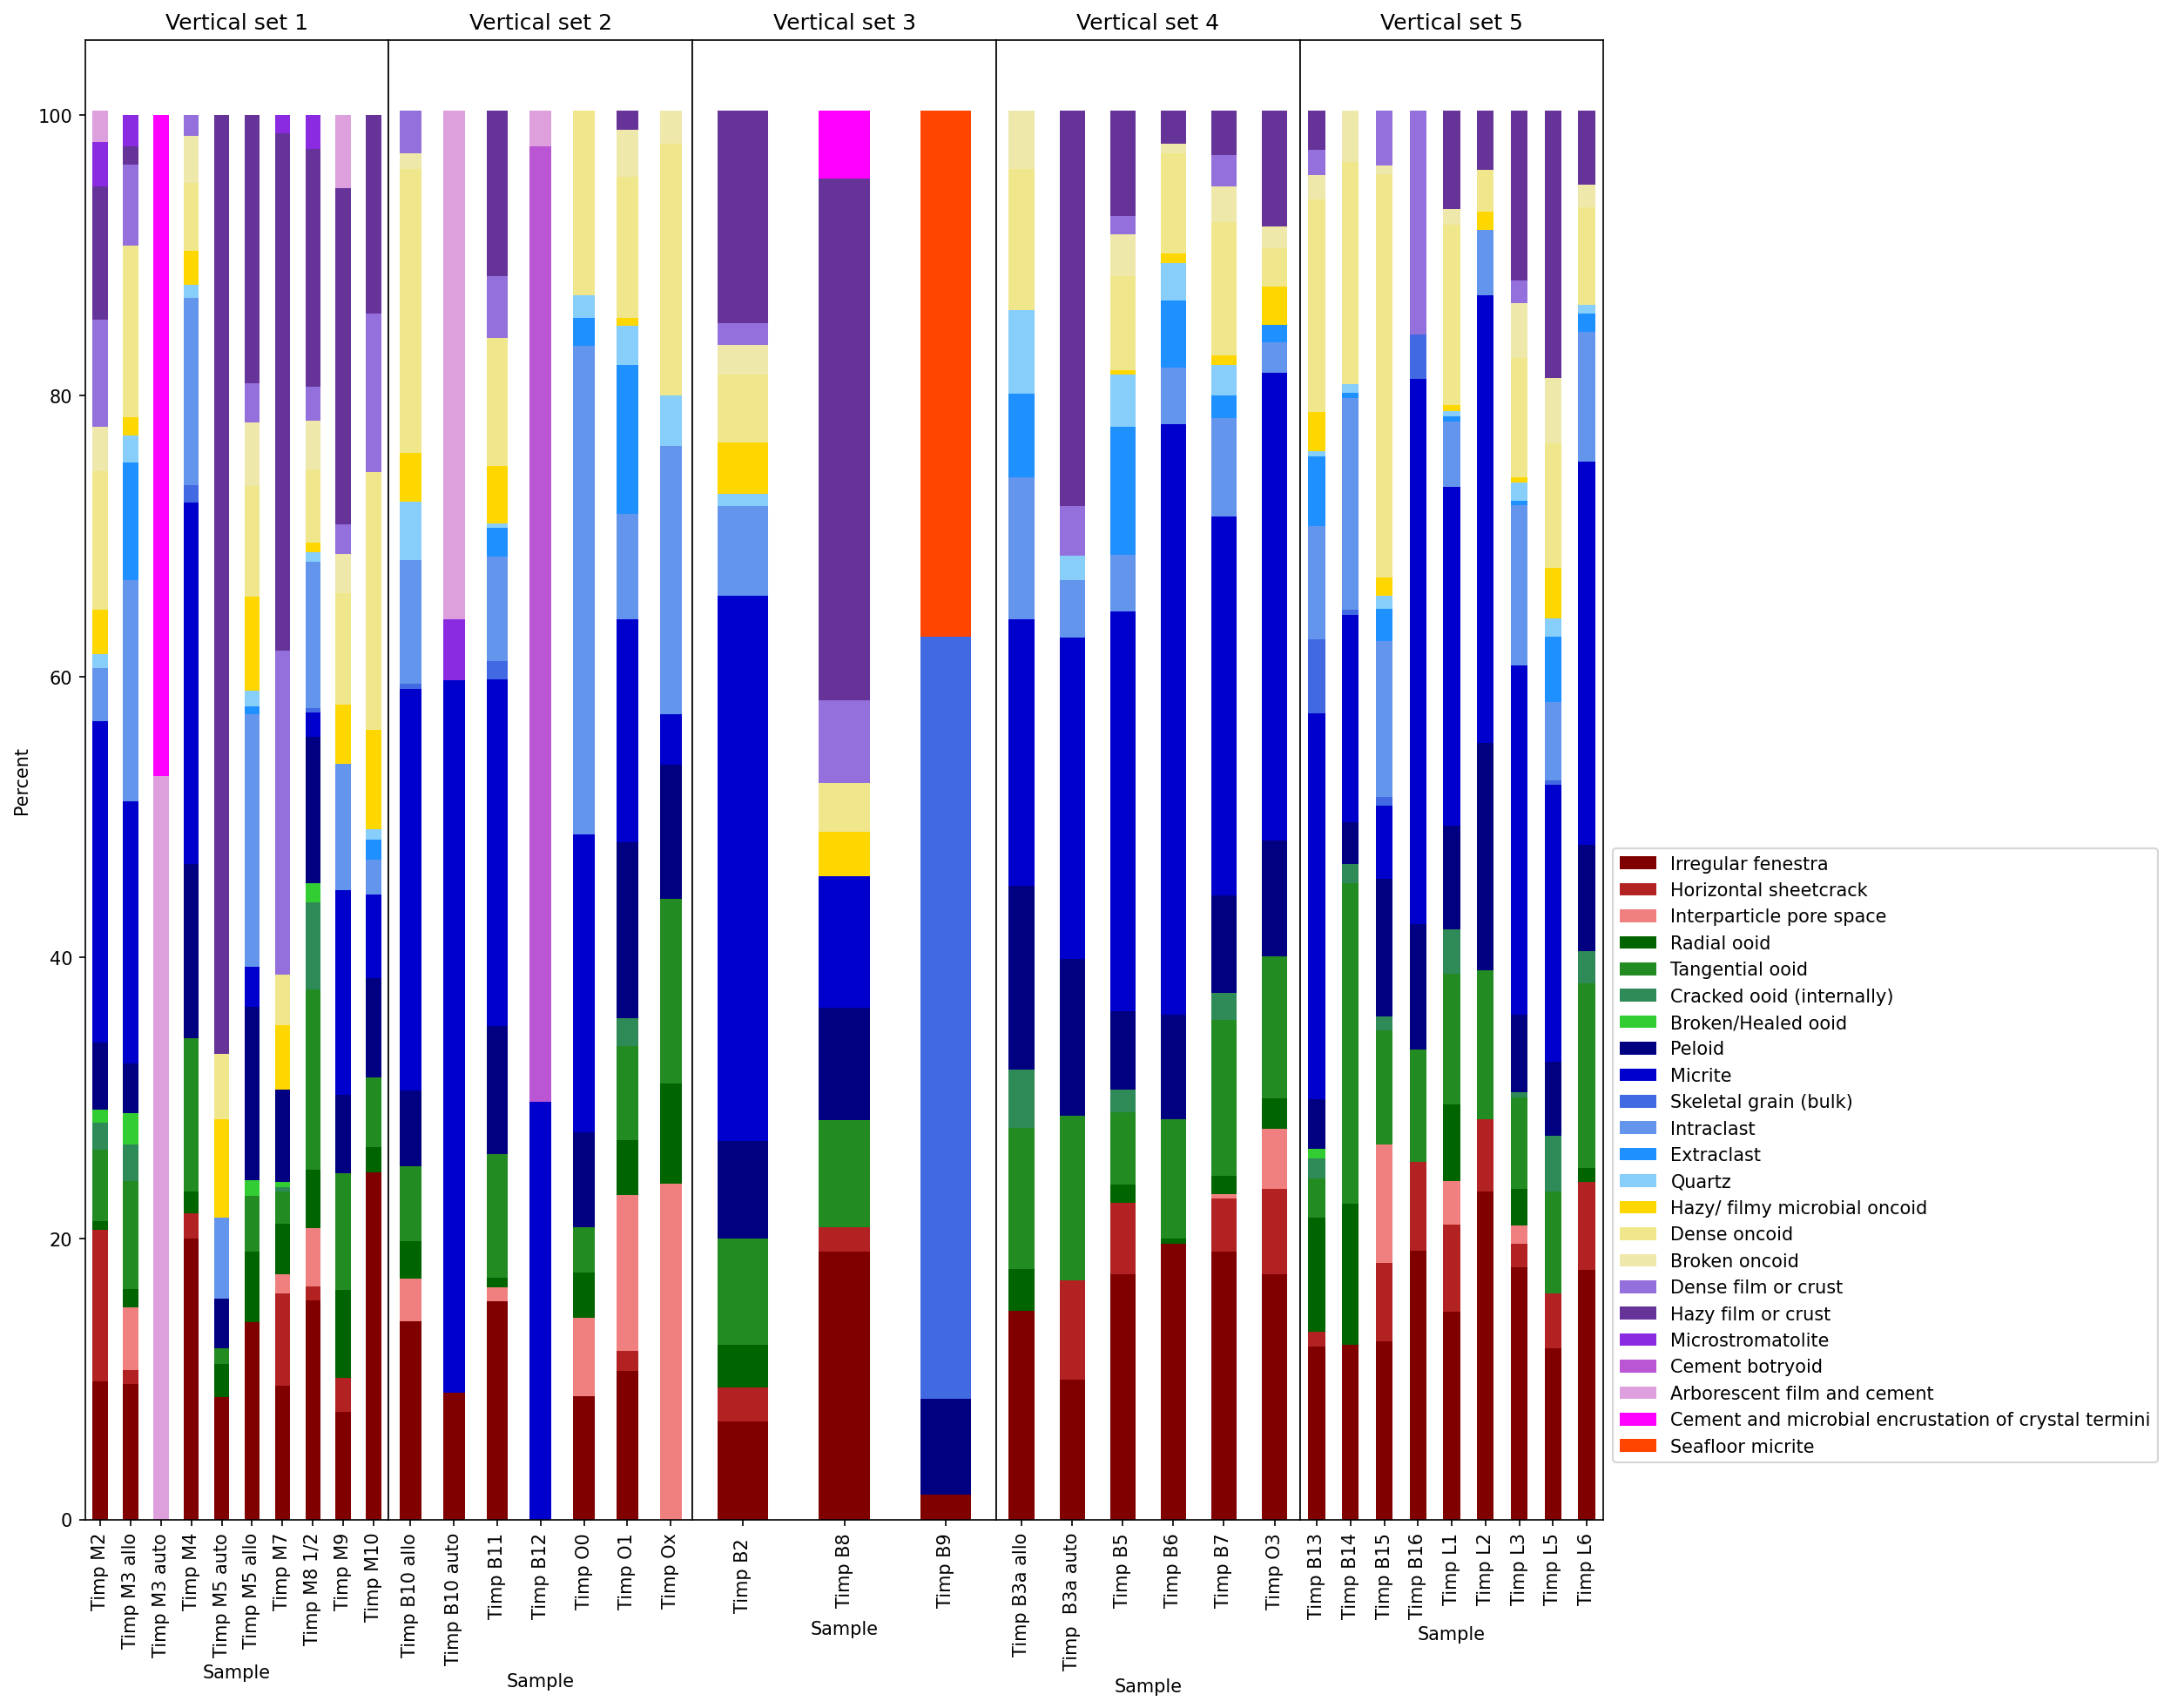

In [4]:
#set up the color groupings
data = {'col':['maroon','firebrick','lightcoral','darkgreen','forestgreen','seagreen','limegreen',\
               'navy','mediumblue','royalblue','cornflowerblue','dodgerblue','lightskyblue','gold',\
               'khaki','palegoldenrod','mediumpurple','rebeccapurple','blueviolet','mediumorchid',\
               'plum','magenta','orangered']}
sym = pd.DataFrame(data)

#set up figure axis
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))

fig.subplots_adjust(wspace=0,)


ver1 = dfNorm.where(df['Vertical Index'].eq(1))
ver2 = dfNorm.where(df['Vertical Index'].eq(2))
ver3 = dfNorm.where(df['Vertical Index'].eq(3))
ver4 = dfNorm.where(df['Vertical Index'].eq(4))
ver5 = dfNorm.where(df['Vertical Index'].eq(5))
#vert6 = dfNorm.where(df['Vertical Index'].eq(6))
#vert7 = dfNorm.where(df['Vertical Index'].eq(7))
#vert8 = dfNorm.where(df['Vertical Index'].eq(8))
#vert9 = dfNorm.where(df['Vertical Index'].eq(9))
#vert10 = dfNorm.where(df['Vertical Index'].eq(10))

#drop nans -- this step is not working otherwise this is good to go
ver1d = ver1.dropna(subset=['Sample'])
ver2d = ver2.dropna(subset=['Sample'])
ver3d = ver3.dropna(subset=['Sample'])
ver4d = ver4.dropna(subset=['Sample'])
ver5d = ver5.dropna(subset=['Sample'])
#ver6d = lat5.dropna(subset=['Sample'])
#ver7d = lat5.dropna(subset=['Sample'])
#ver8d = lat5.dropna(subset=['Sample'])
#ver9d = lat5.dropna(subset=['Sample'])
#ver10d = lat5.dropna(subset=['Sample'])

#plot
ver1d.plot.bar(x='Sample', stacked=True, ax=ax[0], legend=False, color=sym['col'],\
              title='Vertical set 1', ylabel='Percent')
ver2d.plot.bar(x='Sample', stacked=True,ax=ax[1], legend=False, color=sym['col'],\
               title='Vertical set 2', yticks=[])
ver3d.plot.bar(x='Sample', stacked=True,ax=ax[2], legend=False, color=sym['col'],\
               title='Vertical set 3', yticks=[])
ver4d.plot.bar(x='Sample', stacked=True,ax=ax[3], legend=False, color=sym['col'],\
               title='Vertical set 4', yticks=[])
ver5d.plot.bar(x='Sample', stacked=True,ax=ax[4], legend=False, color=sym['col'],\
               title='Vertical set 5', yticks=[])

plt.legend(bbox_to_anchor=(1, .46))
plt.show()




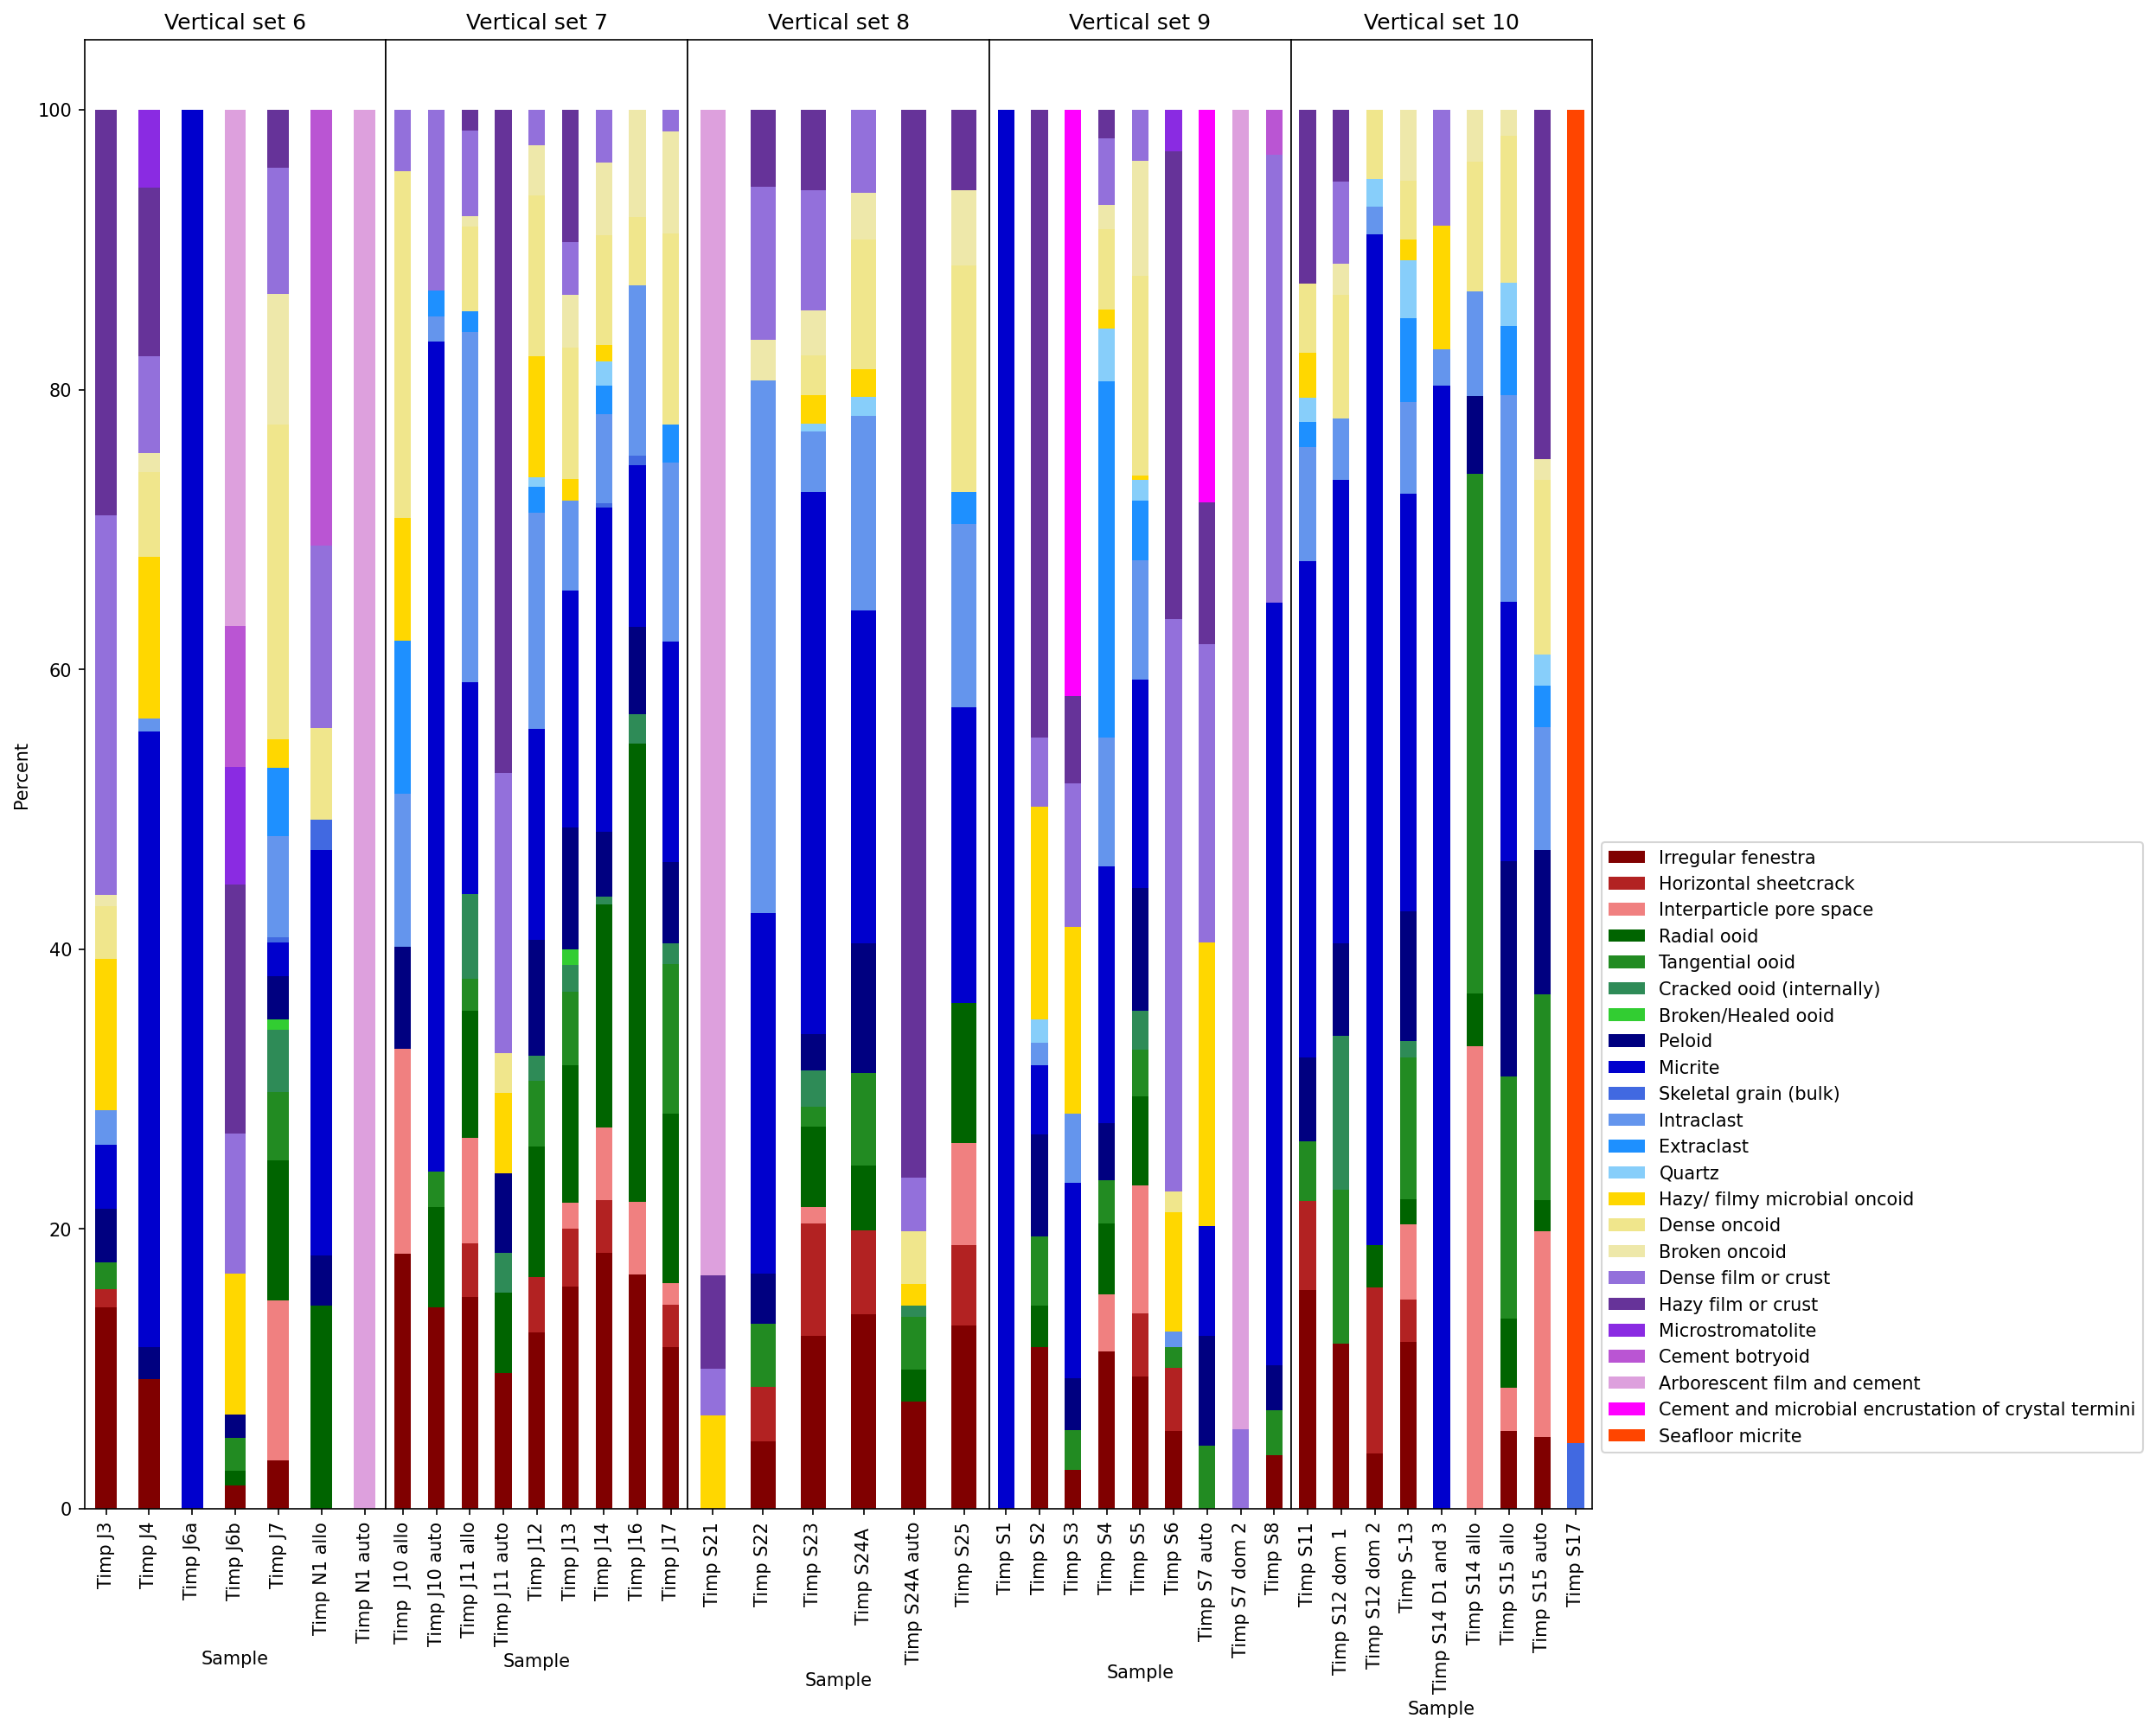

In [5]:
#set up the color groupings
data = {'col':['maroon','firebrick','lightcoral','darkgreen','forestgreen','seagreen','limegreen',\
               'navy','mediumblue','royalblue','cornflowerblue','dodgerblue','lightskyblue','gold',\
               'khaki','palegoldenrod','mediumpurple','rebeccapurple','blueviolet','mediumorchid',\
               'plum','magenta','orangered']}
sym = pd.DataFrame(data)

#set up figure axis
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))

fig.subplots_adjust(wspace=0,)

lat6 = dfNorm.where(df['Vertical Index'].eq(6))
lat7 = dfNorm.where(df['Vertical Index'].eq(7))
lat8 = dfNorm.where(df['Vertical Index'].eq(8))
lat9 = dfNorm.where(df['Vertical Index'].eq(9))
lat10 = dfNorm.where(df['Vertical Index'].eq(10))

ver6d = lat6.dropna(subset=['Sample'])
ver7d = lat7.dropna(subset=['Sample'])
ver8d = lat8.dropna(subset=['Sample'])
ver9d = lat9.dropna(subset=['Sample'])
ver10d = lat10.dropna(subset=['Sample'])

ver6d.plot.bar(x='Sample', stacked=True, ax=ax[0], legend=False, color=sym['col'],\
               title='Vertical set 6', ylabel='Percent')
ver7d.plot.bar(x='Sample', stacked=True,ax=ax[1], legend=False, color=sym['col'],\
               title='Vertical set 7', yticks=[])
ver8d.plot.bar(x='Sample', stacked=True,ax=ax[2], legend=False, color=sym['col'],\
               title='Vertical set 8', yticks=[])
ver9d.plot.bar(x='Sample', stacked=True,ax=ax[3], legend=False, color=sym['col'],\
               title='Vertical set 9', yticks=[])
ver10d.plot.bar(x='Sample', stacked=True,ax=ax[4], legend=False, color=sym['col'],\
               title='Vertical set 10', yticks=[])

plt.legend(bbox_to_anchor =(1, .46))

In [35]:
data = {'col':['b','r','g','c','m','blueviolet','teal','palevioletred','gold',\
                      'darkgreen'],'mark':['o','s','^','p','*','d','X','>','<','v']}
sym = pd.DataFrame(data)

Text(0, 0.5, 'Percentages')

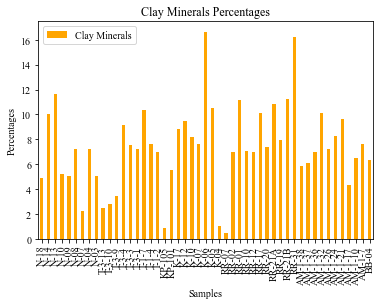

In [67]:
#plot samples collected vertically
# plotClay = dFthinSectionData.loc[:, "Clay Minerals"];
# plotClay.plot(kind="bar", stacked=True, legend=True, color="orange")
# plt.title("Clay Minerals Percentages")
# plt.xlabel("Samples")
# plt.ylabel("Percentages")

In [70]:
pip install plotly==5.5.0

Note: you may need to restart the kernel to use updated packages.


# Carbonate Ternary Diagram

In [72]:
#plot QFL on ternary diagram
import plotly.express as px
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
Quartz = dFthinSectionData.loc[:,"Quartz"]
Feldspars = dFthinSectionData.loc[:,"Feldspars"]
Litics = dFthinSectionData.loc[:,"Lithics"]
df = dFthinSectionData.loc[:, "Quartz": "Lithics"]
fig = px.scatter_ternary(df, a="Quartz", b="Feldspars", c="Lithics")
fig.show()